# Logistic Regression 
### ML Model Training and Evaluation

In [11]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve


In [12]:
# training df 
df_train = pd.read_csv('../../data/train/customer_churn_dataset-training-clean.csv')
#test df 
df_test = pd.read_csv('../../data/test/customer_churn_dataset-testing-clean.csv')


In [13]:
# training data setting fitting variables and predictor
X_train = df_train[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_train = df_train['churn']

# test data setting fitting variables and predictor
X_test = df_test[['age', 'gender', 'tenure', 'usage_frequency', 'support_calls',
       'payment_delay', 'subscription_type', 'contract_length', 'total_spend',
       'last_interaction']]
y_test = df_test['churn']

In [14]:
logres_model = LogisticRegression(max_iter=10000)
logres_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [15]:
train_pred = logres_model.predict(X_train)
test_pred = logres_model.predict(X_test)

train_prob = logres_model.predict_proba(X_train)[:, 1]
test_prob = logres_model.predict_proba(X_test)[:, 1]

In [16]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

train_accuracy_report = classification_report(y_train, train_pred)
test_accuracy_report = classification_report(y_test, test_pred)

train_accuracy_roc_auc = roc_auc_score(y_train, train_pred)
test_accuracy_roc_auc = roc_auc_score(y_test, test_pred)

In [17]:
print('--------accuracy---------')
print(f'1. Training Accuracy Score: {train_accuracy:.2f}')
print(f'2. Testing Accuracy Score: {test_accuracy:.2f}')
print('--------classification reports---------')
print(f'1. Training Classification Report :\n {train_accuracy_report}')
print(f'2. Testing Classification Report :\n {test_accuracy_report}')
print('--------roc_auc---------')
print(f'1. Training roc_auc Score :\n {train_accuracy_roc_auc}')
print(f'2. testing roc_auc score :\n {test_accuracy_roc_auc}')

--------accuracy---------
1. Training Accuracy Score: 0.82
2. Testing Accuracy Score: 0.82
--------classification reports---------
1. Training Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.82      0.81    157300
           1       0.85      0.83      0.84    196344

    accuracy                           0.82    353644
   macro avg       0.82      0.82      0.82    353644
weighted avg       0.83      0.82      0.82    353644

2. Testing Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.81      0.80     67414
           1       0.85      0.83      0.84     84148

    accuracy                           0.82    151562
   macro avg       0.82      0.82      0.82    151562
weighted avg       0.82      0.82      0.82    151562

--------roc_auc---------
1. Training roc_auc Score :
 0.823771821497094
2. testing roc_auc score :
 0.8226674860044926


In [72]:
#(feature importance) coefficients
coeffs = logres_model.coef_[0]
feature_names = X_test.columns
base_feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coeffs}).sort_values(by='Importance',key=abs, ascending=False)


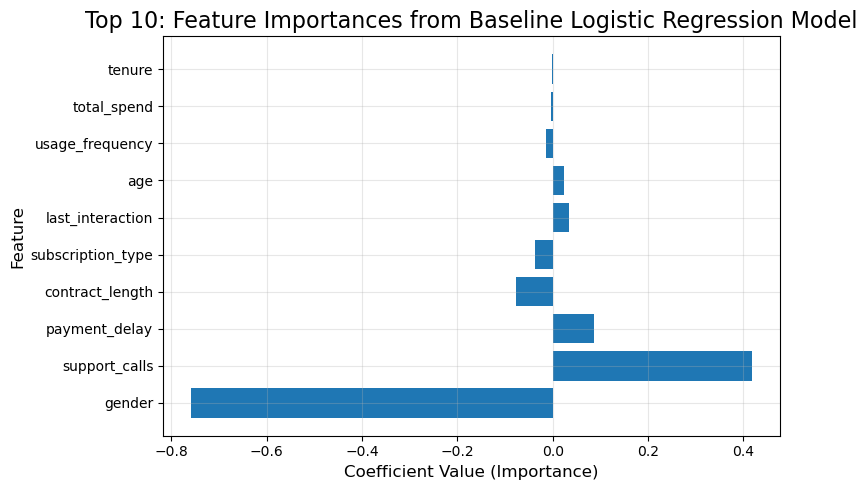

In [73]:

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(base_feature_importance['Feature'], base_feature_importance['Importance'])
plt.xlabel('Coefficient Value (Importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10: Feature Importances from Baseline Logistic Regression Model', fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Hyperparams with Pipeline

In [20]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
pipe = Pipeline([
    ('scaler', None),
    ('poly_feat', PolynomialFeatures(degree=2)),
    ('log_reg',  LogisticRegression(max_iter=10000))
])

params = {
    'scaler' : [StandardScaler(), MinMaxScaler(), None],
    'poly_feat__degree' : [1, 2, 3],
    'log_reg__C' : np.logspace(-2, 0, num=3), #regularisation defaults to Ridge
    'log_reg__solver' : ['liblinear']
}

random_search = RandomizedSearchCV(
    pipe, param_distributions=params, cv=4, n_iter=4, scoring='roc_auc', random_state=42, verbose=3
)

random_search.fit(X_train, y_train)

print('Best Params: \n', random_search.best_params_)
print('Best Score (roc_auc): \n', random_search.best_score_)
print('Best Estimator: \n ', random_search.best_estimator_)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=3, scaler=None;, score=0.923 total time= 1.2min
[CV 2/4] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=3, scaler=None;, score=0.922 total time= 1.1min
[CV 3/4] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=3, scaler=None;, score=0.923 total time= 1.2min
[CV 4/4] END log_reg__C=0.01, log_reg__solver=liblinear, poly_feat__degree=3, scaler=None;, score=0.924 total time= 1.2min
[CV 1/4] END log_reg__C=0.1, log_reg__solver=liblinear, poly_feat__degree=2, scaler=MinMaxScaler();, score=0.931 total time=   3.0s
[CV 2/4] END log_reg__C=0.1, log_reg__solver=liblinear, poly_feat__degree=2, scaler=MinMaxScaler();, score=0.932 total time=   3.4s
[CV 3/4] END log_reg__C=0.1, log_reg__solver=liblinear, poly_feat__degree=2, scaler=MinMaxScaler();, score=0.933 total time=   3.1s
[CV 4/4] END log_reg__C=0.1, log_reg__solver=libline

In [ ]:
# best model predictions
best_log_reg = random_search.best_estimator_
hyper_param_train_pred = best_log_reg.predict(X_train)
hyper_param_test_pred = best_log_reg.predict(X_test)

In [77]:
# getting metrics for train and test
hyper_param_train_accuracy = accuracy_score(y_train, hyper_param_train_pred)
hyper_param_test_accuracy = accuracy_score(y_test, hyper_param_test_pred)

hyper_param_train_accuracy_report = classification_report(y_train, hyper_param_train_pred)
hyper_param_test_accuracy_report = classification_report(y_test, hyper_param_test_pred)

hyper_param_train_accuracy_roc_auc = roc_auc_score(y_train, hyper_param_train_pred)
hyper_param_test_accuracy_roc_auc = roc_auc_score(y_test, hyper_param_test_pred)

hyper_param_train_confusion_matrix = confusion_matrix(y_train, hyper_param_train_pred)
hyper_param_test_confusion_matrix = confusion_matrix(y_test, hyper_param_test_pred)

In [76]:
print('--------HYPER-PARAM LOGISTIC REGRESSION MODEL---------')

print('--------accuracy---------')
print(f'1. Training Accuracy Score: {hyper_param_train_accuracy:.2f}')
print(f'2. Testing Accuracy Score: {hyper_param_test_accuracy:.2f}')
print('--------classification reports---------')
print(f'1. Training Classification Report :\n {hyper_param_train_accuracy_report}')
print(f'2. Testing Classification Report :\n {hyper_param_test_accuracy_report}')
print('--------roc_auc---------')
print(f'1. Training roc_auc Score :\n {hyper_param_train_accuracy_roc_auc}')
print(f'2. Testing roc_auc score :\n {hyper_param_test_accuracy_roc_auc}')
print('--------confusion_matrix---------')
print(f'1. Training Confusion Matrix :\n {hyper_param_train_confusion_matrix}')
print(f'2. Testing Confusion Matrix :\n {hyper_param_test_confusion_matrix}')

--------HYPER-PARAM LOGISTIC REGRESSION MODEL---------
--------accuracy---------
1. Training Accuracy Score: 0.89
2. Testing Accuracy Score: 0.89
--------classification reports---------
1. Training Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.87      0.87    157300
           1       0.90      0.89      0.90    196344

    accuracy                           0.89    353644
   macro avg       0.88      0.88      0.88    353644
weighted avg       0.89      0.89      0.89    353644

2. Testing Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.87      0.87     67414
           1       0.90      0.90      0.90     84148

    accuracy                           0.89    151562
   macro avg       0.88      0.88      0.88    151562
weighted avg       0.89      0.89      0.89    151562

--------roc_auc---------
1. Training roc_auc Score :
 0.8839141317006602
2. Testing roc

### Creating precision/recall dataframe for model comparison

In [83]:
def create_metrics_dict(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    # classification report generating dictionary
    report = classification_report(y_test, y_pred, output_dict=True)
    
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']
    
   
    metrics_dict = {
        'precision_0': precision_0,
        'recall_0': recall_0,
        'precision_1': precision_1,
        'recall_1': recall_1
    }
    
    metrics_df = pd.DataFrame([metrics_dict])

    metrics_df.to_csv('./model_comparison_CSVs/01_logreg_metrics.csv', index=False)

    return metrics_dict


In [84]:
metrics_logreg = create_metrics_dict(best_log_reg, X_test, y_test)

# resulting dictionary 
print(metrics_logreg)

{'precision_0': 0.869641062030631, 'recall_0': 0.872608063606966, 'precision_1': 0.8976620033842561, 'recall_1': 0.8952084422683843}


### hyper param model feature importance

In [67]:

# Extract the polynomial feature transformer
poly_feat = best_log_reg.named_steps['poly_feat']

# Extract the logistic regression model
log_reg = best_log_reg.named_steps['log_reg']

#feature names having applied polynomial 
feature_names = poly_feat.get_feature_names_out(input_features=X_train.columns)

# Extract coefficients from the logistic regression model
coefficients = log_reg.coef_.flatten()  # Flatten as binary classification

# Combine feature names with their coefficients
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
}).sort_values(by='Importance', key=abs, ascending=False)

top_10_features = feature_importances.head(10)


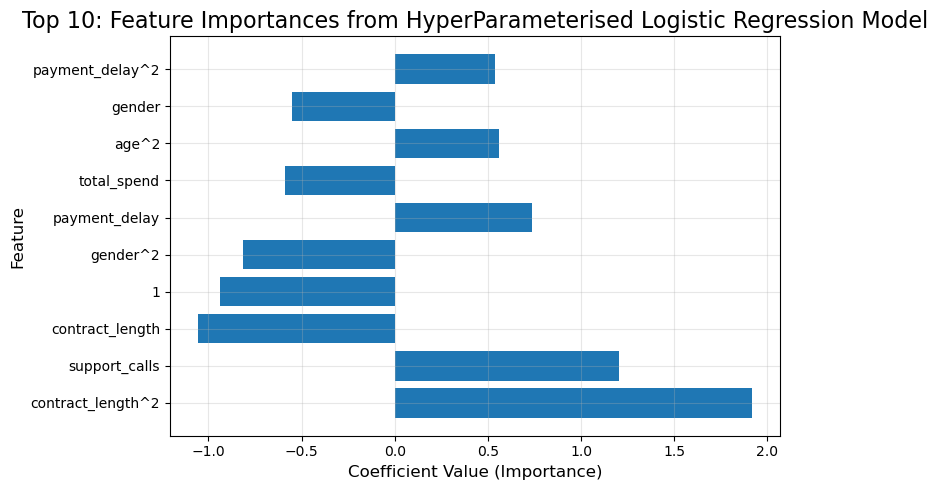

In [68]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(8, 5))
plt.barh(top_10_features['Feature'], top_10_features['Importance'])
plt.xlabel('Coefficient Value (Importance)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10: Feature Importances from HyperParameterised Logistic Regression Model', fontsize=16)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [27]:
import pickle

# Save the best model
with open('../../models/trained_model_01_logreg_StScal_Poly.pkl', 'wb') as f:
    pickle.dump(best_log_reg, f)

# Load the saved model
#with open('trained_model_01_LogReg.pkl', 'rb') as f:
#    best_log_reg_loaded = pickle.load(f)
